In [39]:
from bs4 import BeautifulSoup as bs4
from lxml import html
import os
import psycopg2 as pg
import requests
import time
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
import datetime
import seaborn as sns
from decimal import Decimal, ROUND_HALF_UP

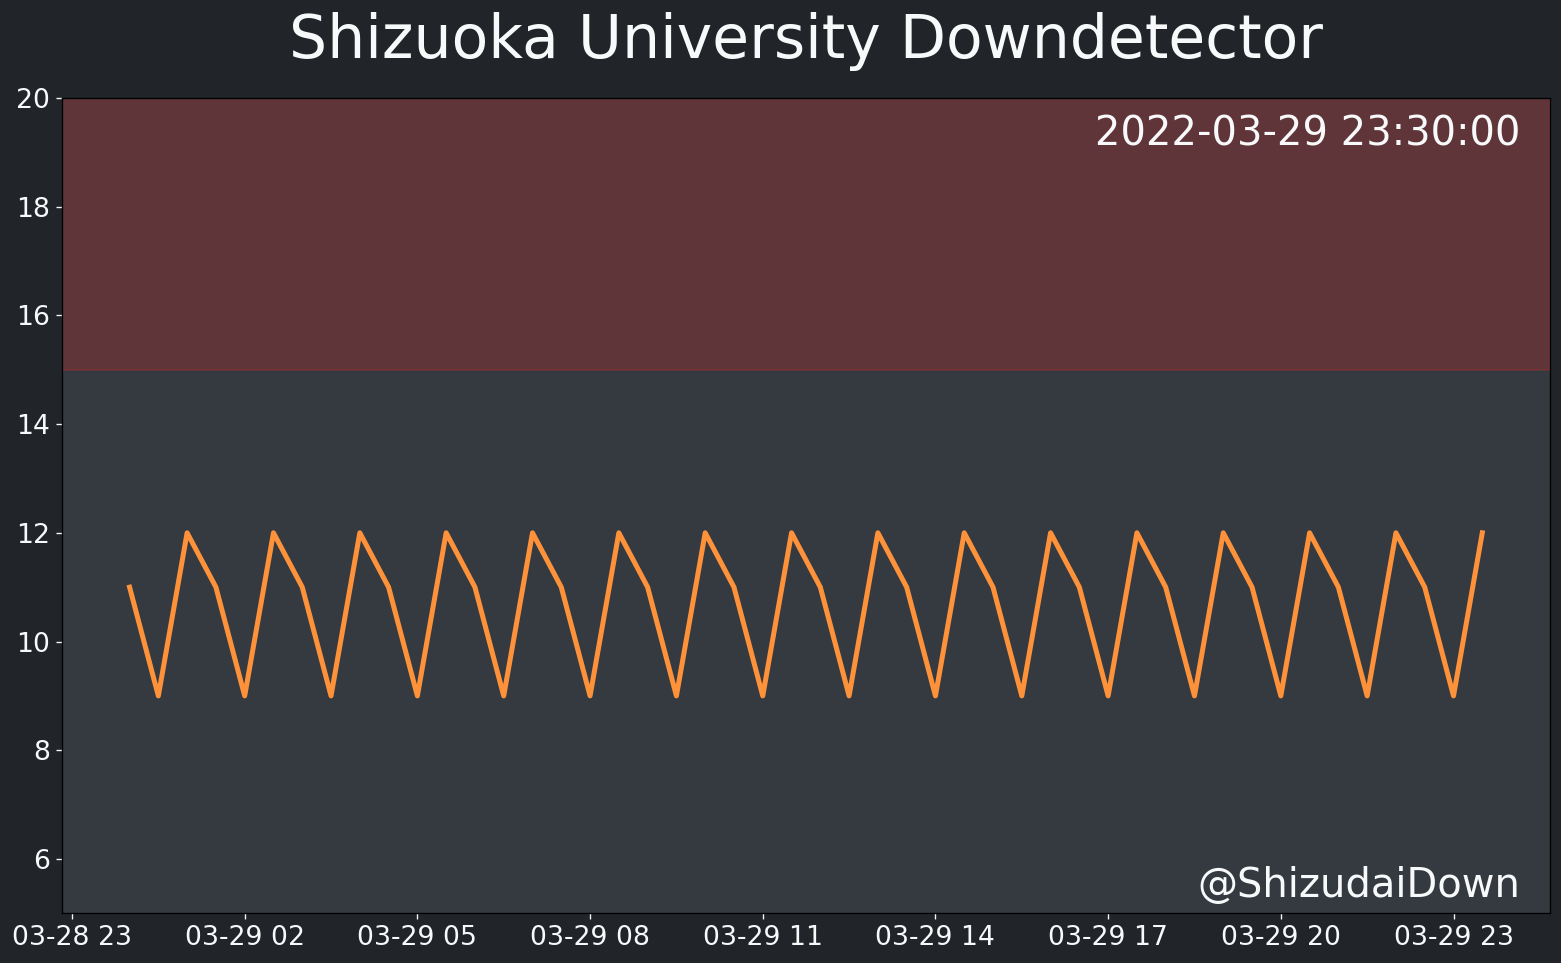

In [56]:
df = pd.DataFrame(data={'timestamp': [datetime.datetime(2022, 3, 29, 0, 0, 0), datetime.datetime(2022, 3, 29, 0, 30, 0), datetime.datetime(2022, 3, 29, 1, 0, 0), datetime.datetime(2022, 3, 29, 1, 30, 0), datetime.datetime(2022, 3, 29, 2, 0, 0), datetime.datetime(2022, 3, 29, 2, 30, 0), datetime.datetime(2022, 3, 29, 3, 0, 0), datetime.datetime(2022, 3, 29, 3, 30, 0), datetime.datetime(2022, 3, 29, 4, 0, 0), datetime.datetime(2022, 3, 29, 4, 30, 0), datetime.datetime(2022, 3, 29, 5, 0, 0), datetime.datetime(2022, 3, 29, 5, 30, 0), datetime.datetime(2022, 3, 29, 6, 0, 0), datetime.datetime(2022, 3, 29, 6, 30, 0), datetime.datetime(2022, 3, 29, 7, 0, 0), datetime.datetime(2022, 3, 29, 7, 30, 0), datetime.datetime(2022, 3, 29, 8, 0, 0), datetime.datetime(2022, 3, 29, 8, 30, 0), datetime.datetime(2022, 3, 29, 9, 0, 0), datetime.datetime(2022, 3, 29, 9, 30, 0), datetime.datetime(2022, 3, 29, 10, 0, 0), datetime.datetime(2022, 3, 29, 10, 30, 0), datetime.datetime(2022, 3, 29, 11, 0, 0), datetime.datetime(2022, 3, 29, 11, 30, 0), datetime.datetime(2022, 3, 29, 12, 0, 0), datetime.datetime(2022, 3, 29, 12, 30, 0), datetime.datetime(2022, 3, 29, 13, 0, 0), datetime.datetime(2022, 3, 29, 13, 30, 0), datetime.datetime(2022, 3, 29, 14, 0, 0), datetime.datetime(2022, 3, 29, 14, 30, 0), datetime.datetime(2022, 3, 29, 15, 0, 0), datetime.datetime(2022, 3, 29, 15, 30, 0), datetime.datetime(2022, 3, 29, 16, 0, 0), datetime.datetime(2022, 3, 29, 16, 30, 0), datetime.datetime(2022, 3, 29, 17, 0, 0), datetime.datetime(2022, 3, 29, 17, 30, 0), datetime.datetime(2022, 3, 29, 18, 0, 0), datetime.datetime(2022, 3, 29, 18, 30, 0), datetime.datetime(2022, 3, 29, 19, 0, 0), datetime.datetime(2022, 3, 29, 19, 30, 0), datetime.datetime(2022, 3, 29, 20, 0, 0), datetime.datetime(2022, 3, 29, 20, 30, 0), datetime.datetime(2022, 3, 29, 21, 0, 0), datetime.datetime(2022, 3, 29, 21, 30, 0), datetime.datetime(2022, 3, 29, 22, 0, 0), datetime.datetime(2022, 3, 29, 22, 30, 0), datetime.datetime(2022, 3, 29, 23, 0, 0), datetime.datetime(2022, 3, 29, 23, 30, 0)], 'duration': [11, 9, 12, 11, 9, 12, 11, 9, 12, 11, 9, 12, 11, 9, 12, 11, 9, 12, 11, 9, 12, 11, 9, 12, 11, 9, 12, 11, 9, 12, 11, 9, 12, 11, 9, 12, 11, 9, 12, 11, 9, 12, 11, 9, 12, 11, 9, 12]})
fig, ax = plt.subplots(figsize=(16, 9), dpi=120)
ax.plot(df['timestamp'], df['duration'], color='#fe923a', linewidth=3)
fig.set_facecolor('#212529')
ax.set_facecolor('#343a40')
ax.tick_params(axis='x', colors='#f8f9fa', labelsize=16)
ax.tick_params(axis='y', colors='#f8f9fa', labelsize=16)
ax.xaxis.set_major_locator(mdates.HourLocator(interval=3))
ax.set_ylim(5, 20)
ax.axhspan(ymin=15, ymax=99, color='#c92a2a', alpha=0.3)
ax.text(0.98, 0.98, df[-1:]['timestamp'].iloc[-1].strftime('%Y-%m-%d %H:%M:%S'), va='top', ha='right',
        transform=ax.transAxes, color='#f8f9fa', size=24)
ax.text(0.98, 0.02, '@ShizudaiDown', horizontalalignment='right',
        transform=ax.transAxes, color='#f8f9fa', size=24)
ax.set_title('Shizuoka University Downdetector', loc='center', color='#f8f9fa', size=36, pad=24)
fig.savefig('plot.png')
